In [7]:
import sys
sys.path.insert(0, "..")
from utils.dataset_utils import OriginalDataset, plot_image_array, plot_delta

# Standard Downloads
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [8]:
original_dataset = OriginalDataset('../datasets/droid_100_sample_pictures')
len_ = (original_dataset.__len__())
print(len_)
image1 = original_dataset[0]
image1 = np.array(image1, dtype = np.int16)
image1.shape


166


(180, 320, 3)

(180, 320, 3)


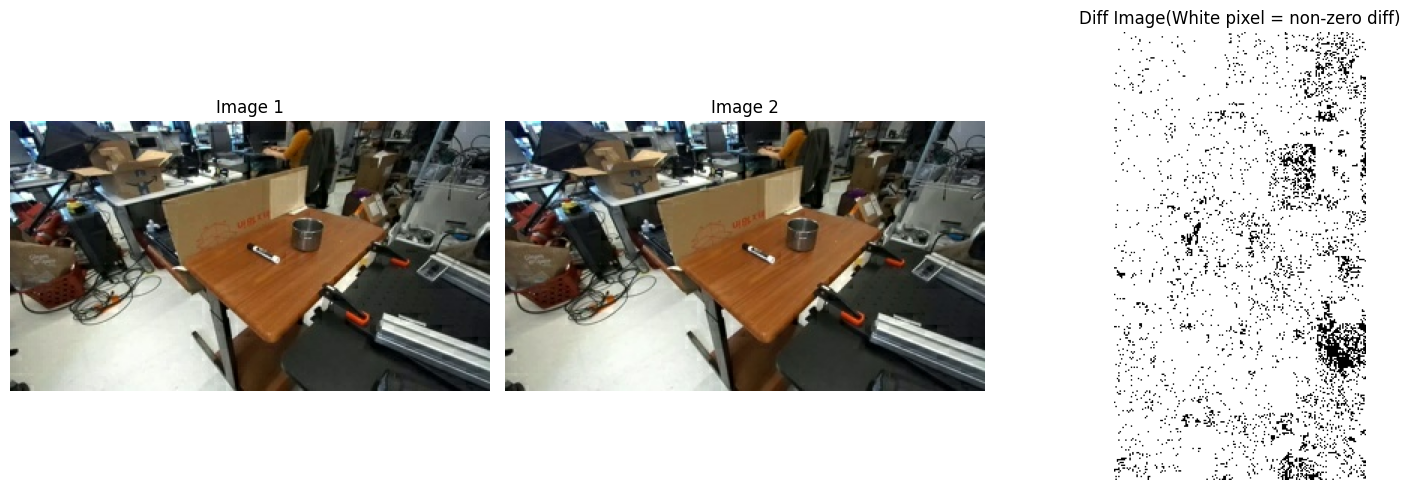

In [9]:
image1 = original_dataset[0]
image2 = original_dataset[1]
image1 = np.array(image1, dtype = np.int16)
image2 = np.array(image2, dtype = np.int16)
image1
non_zero_diff_count, image3 = plot_delta(image2 - image1)

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
print(image1.shape)
# Plot each image
axes[0].imshow(image1)
axes[0].set_title('Image 1')
axes[0].axis('off')  # Turn off axis labels

axes[1].imshow(image2)
axes[1].set_title('Image 2')
axes[1].axis('off')

axes[2].imshow(image3, cmap="gray")
axes[2].set_title('Diff Image(White pixel = non-zero diff)')
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

(180, 320, 3)


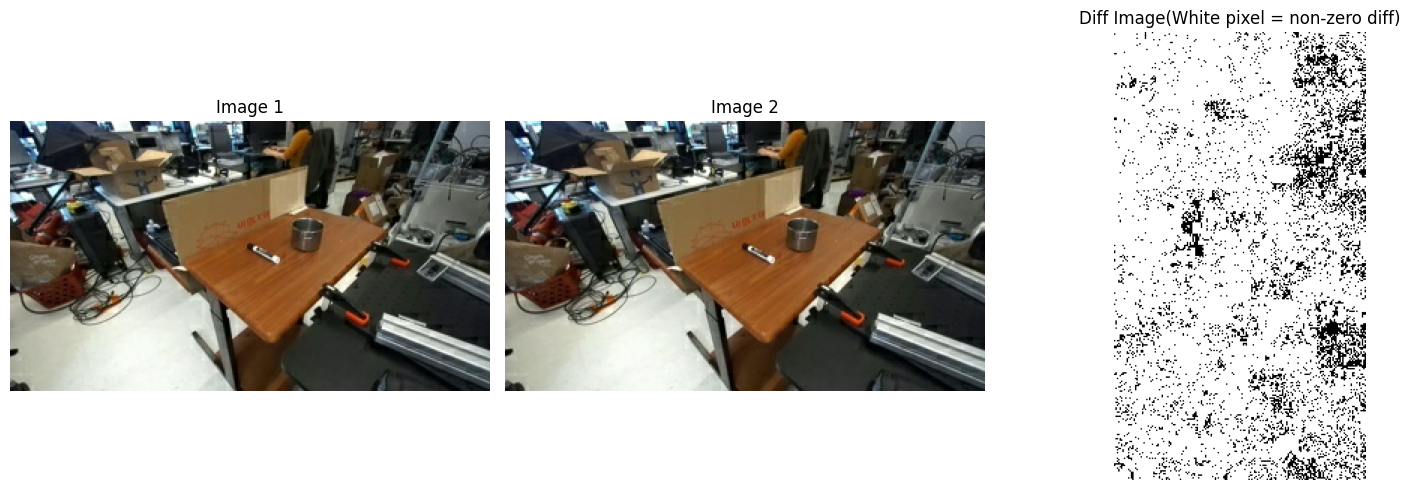

In [10]:
image1 = original_dataset[1]
image2 = original_dataset[2]
image1 = np.array(image1, dtype = np.int16)
image2 = np.array(image2, dtype = np.int16)
image1
non_zero_diff_count, image3 = plot_delta(image2 - image1)

# Create a figure to hold the subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
print(image1.shape)
# Plot each image
axes[0].imshow(image1)
axes[0].set_title('Image 1')
axes[0].axis('off')  # Turn off axis labels

axes[1].imshow(image2)
axes[1].set_title('Image 2')
axes[1].axis('off')

axes[2].imshow(image3, cmap="gray")
axes[2].set_title('Diff Image(White pixel = non-zero diff)')
axes[2].axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [11]:
class ArithmeticEncoder:
    def __init__(self, precision=32):
        self.low = 0
        self.high = (1 << precision) - 1
        self.scale = 0

    def encode_symbol(self, low_prob, high_prob, total, symbol):
        range_ = self.high - self.low + 1
        self.high = self.low + (range_ * high_prob) // total - 1
        self.low = self.low + (range_ * low_prob) // total

        while True:
            if self.high < (1 << 31):
                # Emit 0
                self.output_bit(0)
                self.shift()
            elif self.low >= (1 << 31):
                # Emit 1
                self.output_bit(1)
                self.shift()
            elif (1 << 30) <= self.low < (1 << 31) <= self.high:
                self.scale += 1
                self.low -= (1 << 30)
                self.high -= (1 << 30)
            else:
                break
            self.low <<= 1
            self.high = (self.high << 1) + 1

    def shift(self):
        pass  # Handle bit output logic here


In [12]:
class ArithmeticDecoder:
    def __init__(self, encoded_stream):
        self.stream = encoded_stream

    def decode_symbol(self, low_prob, high_prob, total):
        range_ = self.high - self.low + 1
        value = ((self.current_value - self.low + 1) * total - 1) // range_
        # Logic for adjusting low, high, and decoding symbols
        return symbol


In [ ]:
import numpy as np
from skimage.util import view_as_windows
import matplotlib.pyplot as plt

# Step 1: Define Arithmetic Encoder and Decoder Classes
class ArithmeticEncoder:
    def __init__(self, precision=32):
        self.low = int(0)  # Ensure this is an integer
        self.high = int((1 << precision) - 1)  # Ensure this is an integer
        self.scale = int(0)
        self.output_bits = []

    def encode_symbol(self, low_prob, high_prob, total):
        range_ = self.high - self.low + 1
        self.high = int(self.low + (range_ * high_prob) // total - 1)
        self.low = int(self.low + (range_ * low_prob) // total)

        while True:
            if self.high < (1 << 31):
                self.output_bit(0)
                self.shift()
            elif self.low >= (1 << 31):
                self.output_bit(1)
                self.shift()
            elif (1 << 30) <= self.low < (1 << 31) <= self.high:
                self.scale += 1
                self.low -= int(1 << 30)
                self.high -= int(1 << 30)
            else:
                break
            self.low = int(self.low << 1)
            self.high = int((self.high << 1) + 1)

    def output_bit(self, bit):
        self.output_bits.append(bit)
        while self.scale > 0:
            self.output_bits.append(1 - bit)
            self.scale -= 1

    def shift(self):
        pass


class ArithmeticDecoder:
    def __init__(self, encoded_stream, precision=32):
        self.low = 0
        self.high = (1 << precision) - 1
        self.current_value = 0
        self.stream = encoded_stream

    def decode_symbol(self, low_prob, high_prob, total):
        range_ = self.high - self.low + 1
        value = ((self.current_value - self.low + 1) * total - 1) // range_
        symbol = None  # Implement symbol extraction logic
        # Update low, high, and current_value based on decoded symbol
        return symbol

# Step 2: Load images and calculate residuals (delta values)
image1 = original_dataset[0]
image2 = original_dataset[1]
image1 = np.array(image1, dtype=np.int16)
image2 = np.array(image2, dtype=np.int16)

# Calculate residuals
delta = image2 - image1

# Step 3: Divide residuals into contexts (20x20 blocks) for RGB images
block_size = 20

# Ensure the delta image dimensions are divisible by block_size
pad_height = (block_size - delta.shape[0] % block_size) % block_size
pad_width = (block_size - delta.shape[1] % block_size) % block_size

if pad_height > 0 or pad_width > 0:
    delta_padded = np.pad(delta, ((0, pad_height), (0, pad_width), (0, 0)), mode='constant', constant_values=0)
else:
    delta_padded = delta

# Process each channel separately
channels = []
for c in range(delta_padded.shape[2]):  # Iterate over the 3 channels (R, G, B)
    channel_blocks = view_as_windows(delta_padded[:, :, c], (block_size, block_size))
    channels.append(channel_blocks)

# Combine channel blocks into a single structure for further processing
residual_blocks = np.stack(channels, axis=-1)

# Flatten the blocks for encoding
residual_flattened = delta_padded.reshape(-1, delta_padded.shape[2])

# Function to calculate probabilities for a given context
def calculate_probabilities(context):
    values, counts = np.unique(context, return_counts=True)
    probabilities = counts / counts.sum()
    return dict(zip(values, probabilities))

# Calculate probabilities for all channels
context_probabilities = []
for c in range(residual_flattened.shape[1]):
    channel_context_probabilities = calculate_probabilities(residual_flattened[:, c])
    context_probabilities.append(channel_context_probabilities)

# Encode residuals using the Arithmetic Encoder (updated for channels)
encoder = ArithmeticEncoder(32)  # 32-bit precision encoder

encoded_stream = []
for row in residual_flattened:
    for c, value in enumerate(row):
        low_prob = 0  # Replace with actual low probability from context_probabilities[c]
        high_prob = 0  # Replace with actual high probability from context_probabilities[c]
        total = sum(context_probabilities[c].values())
        encoder.encode_symbol(low_prob, high_prob, total)
        encoded_stream.extend(encoder.output_bits)

print("Encoded Residuals Stream:", encoded_stream)

# Decode residuals for lossless validation
decoder = ArithmeticDecoder(encoded_stream, 32)

decoded_residuals = []
for row in residual_flattened:
    decoded_row = []
    for c in range(len(row)):
        low_prob = 0  # Replace with actual low probability from context_probabilities[c]
        high_prob = 0  # Replace with actual high probability from context_probabilities[c]
        total = sum(context_probabilities[c].values())
        decoded_row.append(decoder.decode_symbol(low_prob, high_prob, total))
    decoded_residuals.append(decoded_row)

decoded_residuals = np.array(decoded_residuals).reshape(delta_padded.shape)

# Remove padding before validation
decoded_residuals = decoded_residuals[:delta.shape[0], :delta.shape[1], :]

# Step 6: Validate lossless compression
reconstructed_image2 = image1 + decoded_residuals
assert np.array_equal(image2, reconstructed_image2), "Lossless property violated!"

# Step 7: Visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(image1.astype(np.uint8))
axes[0].set_title('Image 1')
axes[0].axis('off')

axes[1].imshow(image2.astype(np.uint8))
axes[1].set_title('Image 2')
axes[1].axis('off')

axes[2].imshow(delta.astype(np.int16), cmap="gray")
axes[2].set_title('Delta Image')
axes[2].axis('off')

plt.tight_layout()
plt.show()

TypeError: ufunc 'left_shift' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''